# Lab for answering question A
Responsible: Birgit

In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
transformed_df_serial_path = "../data/data_transformed.pickle"

with open(transformed_df_serial_path, "rb") as file:
    df: pd.DataFrame = pickle.load(file)

assert isinstance(df, pd.DataFrame),f"The serialized object in {transformed_df_serial_path} is not a pandas dataframe!"
assert len(df)!=0, "The serialized dataframe contains no data!"

In [3]:
df

,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Country,ISO,Region,Continent,Associated_Dis,Associated_Dis2,Start_Year,Total_Deaths,Total_Affected
0,Natural,Climatological,Drought,Drought,<NA>,Cabo Verde,CPV,Western Africa,Africa,Famine,<NA>,1900,11000,<NA>
1,Natural,Climatological,Drought,Drought,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1900,1250000,<NA>
2,Natural,Geophysical,Earthquake,Ground movement,<NA>,Guatemala,GTM,Central America,Americas,Tsunami/Tidal wave,<NA>,1902,2000,<NA>
3,Natural,Geophysical,Volcanic activity,Ash fall,<NA>,Guatemala,GTM,Central America,Americas,<NA>,<NA>,1902,1000,<NA>
4,Natural,Geophysical,Volcanic activity,Ash fall,<NA>,Guatemala,GTM,Central America,Americas,<NA>,<NA>,1902,6000,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16483,Natural,Biological,Epidemic,Viral disease,<NA>,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,<NA>,<NA>,2022,8,607
16484,Natural,Biological,Epidemic,Viral disease,<NA>,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,<NA>,<NA>,2022,5,141
16485,Natural,Biological,Epidemic,Viral disease,<NA>,Zimbabwe,ZWE,Eastern Africa,Africa,<NA>,<NA>,2022,750,6551
16486,Natural,Biological,Epidemic,Viral disease,<NA>,Timor-Leste,TLS,South-Eastern Asia,Asia,<NA>,<NA>,2022,20,1353


In [4]:
import matplotlib.pyplot as plt

Create a time series for the number of deaths for different levels of granularity (world, continent, countries of 
interest) 
 Check if there are any trends visible in those series and try to understand if those trends are driven by 
special circumstances (big tsunami, …) or if those trends are persistent 

In [5]:
# new column (decade)
decade = df['Start_Year']//10*10 
df['Disaster_Decade'] = decade
df = df.astype({"Total_Deaths": np.float64, "Total_Affected": np.float64, "Start_Year": np.int32, "Disaster_Decade":np.int32})

Regrading the missing death data, we have discussed different options, how/ if to include the number of affected. 
One idea was, to use the number of affected if we do not have the number of deaths. However, this would lead to a big bias in our opinion.
Then we had the idea of looking at the data that has both "no deaths" and "no affected" available. From those data we htought of extracting a percentage with which to multiply the "no affected" to get a approximation for the number of deaths. After thinking about this, we still have the impression, that this would change our data significantly and is not a good approximation, as different disasters can (depending on the serverity) have highly different percentages. 
Therefor we finally decided, even if that meant to leave out about 5.000 data point, to delet the unknown values of deaths and just work with the data where we have definite death numbers - at least for extracting information about the deaths.

In [6]:
df.sum()['Total_Deaths']/(df.max()['Start_Year']-df.min()['Start_Year'])

C:\Users\Birgit\AppData\Local\Temp\ipykernel_9344\2489608835.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()['Total_Deaths']/(df.max()['Start_Year']-df.min()['Start_Year'])


266108.2213114754

Natural disasters killed globally on average 266 thousand people per year over the last 122 years. 

1200000.0

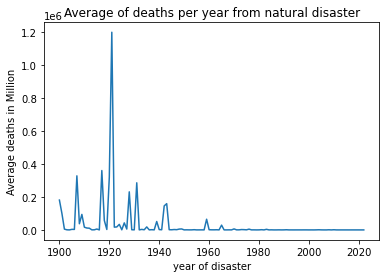

In [7]:
# calc mean deaths, per year and plot them in a bar plot

means = df.groupby(["Start_Year"]).mean()['Total_Deaths'].round()
ax = means.plot(kind = 'line')
ax.set_ylabel('Average deaths in Million')
ax.set_xlabel ('year of disaster')
ax.set_title('Average of deaths per year from natural disaster')
max(means)

Disaster_Decade
1900    62993.0
1910    56508.0
1920    99557.0
1930    38909.0
1940    27315.0
1950     7493.0
1960     3881.0
1970     1624.0
1980      697.0
1990      256.0
2000      265.0
2010      185.0
2020       55.0
Name: Total_Deaths, dtype: float64

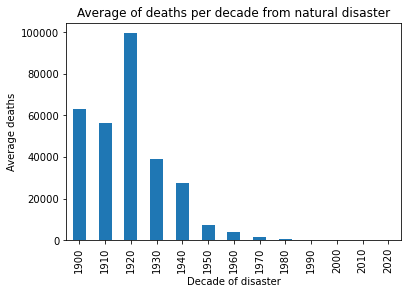

In [8]:
# calc mean deaths, per Decade and plot them in a bar plot
means = df.groupby(["Disaster_Decade"]).mean()['Total_Deaths'].round()
ax = means.plot(kind = 'bar')
ax.set_ylabel('Average deaths')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Average of deaths per decade from natural disaster')
means

When having a look at the average deaths per decade due to natural disaster, it can be seen that there was a peek in the 1920th and the number of deaths decreased over the years. However, this does not automatically mean that the number of natural disasters is decreasing. 

Disaster_Decade
1900    231.0
1910    500.0
1920    233.5
1930    200.0
1940    190.5
1950     88.0
1960     57.0
1970     35.0
1980     34.0
1990     22.0
2000     13.0
2010     13.0
2020      7.0
Name: Total_Deaths, dtype: float64

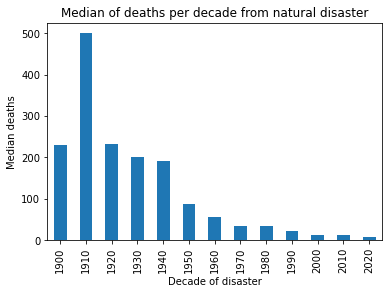

In [9]:
# calc median deaths, per Decade and plot them in a bar plot
medians = df.groupby(["Disaster_Decade"]).median()['Total_Deaths']
ax = medians.plot(kind = 'bar')
ax.set_ylabel('Median deaths')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Median of deaths per decade from natural disaster')
medians

The median compared to the mean shows that there seem to have been some events in 1920 leading to a really high number of deaths. Still we can see, that the number of deaths have significantly decreased in the last 90 years.

Disaster_Decade
1900      79
1910      77
1920     106
1930     135
1940     170
1950     310
1960     593
1970     871
1980    1755
1990    2957
2000    4473
2010    3758
2020    1204
Name: Continent, dtype: int64
Last Start_year of data : 2022
Hochgerechnete Number of natural disasters 2020-2029: 4214.0


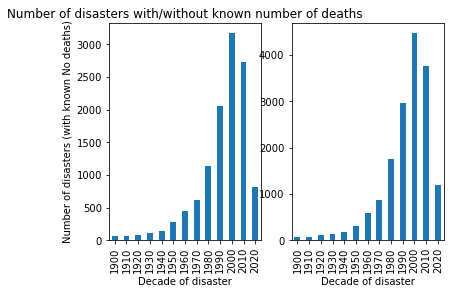

In [10]:
# calc count, per Decade and plot them in a bar plot
counts = df.groupby(["Disaster_Decade"]).count()['Total_Deaths']
plt.subplot(1, 2,1)
ax = counts.plot(kind = 'bar')
ax.set_ylabel('Number of disasters (with known No deaths)')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Number of disasters with/without known number of deaths')

counts = df.groupby(["Disaster_Decade"]).count()['Continent'] # continent just used, because then we to not have a look at na values
plt.subplot(1, 2, 2)
ax = counts.plot(kind = 'bar')
ax.set_xlabel ('Decade of disaster')

print(counts)
print("Last Start_year of data : " +str(df["Start_Year"].max()))
print( "Hochgerechnete Number of natural disasters 2020-2029: " + str(1204*3.5))

In the last decade, the number of deaths or disasters is of course much smaller, since the data only contain information up to the year 2022. The year 2022 has not yet been fully mapped. This value would have to be multiplied by about 3.5 to get a correct ratio.
Additionally it can be seen, that (as the graphics above have shown) the number of deaths decreased in the last century, but the number of natural disasters has definitifly constantly increased. This could either mean, that there are more natural disasters with a lower impact or that e.g. due to better health care or faster help there are just less people dying and the intensity of the disasters did not change that much.

To look a bit more into that, we decided to have a look at the number of affected. For unknown number of affected, we used the number of deaths.

In [11]:
no_affected = df[["Total_Affected","Total_Deaths"]].max(axis =1)
df['No_Affected'] = no_affected

Disaster_Decade
1900     70110.0
1910    148975.0
1920    582304.0
1930    148995.0
1940     48929.0
1950     75256.0
1960    367047.0
1970    714741.0
1980    850532.0
1990    771417.0
2000    546559.0
2010    497357.0
2020    290858.0
Name: No_Affected, dtype: float64


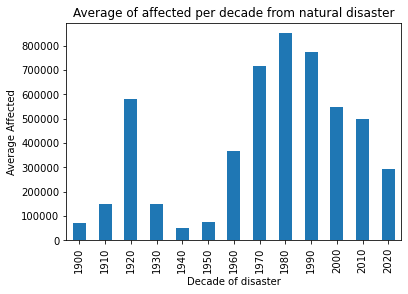

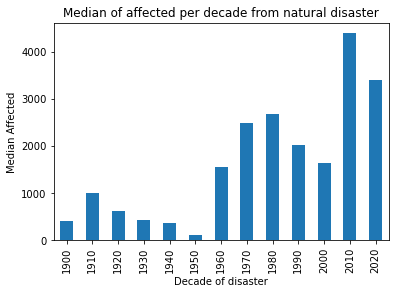

Disaster_Decade
1900     400.0
1910    1000.0
1920     614.5
1930     431.5
1940     360.0
1950     121.0
1960    1549.0
1970    2489.0
1980    2682.0
1990    2025.0
2000    1650.0
2010    4396.5
2020    3400.0
Name: No_Affected, dtype: float64


In [12]:
# calc mean affected, per Decade and plot them in a bar plot
means = df.groupby(["Disaster_Decade"]).mean()['No_Affected'].round()
#plt.subplot(1, 2,1)
ax = means.plot(kind = 'bar')
ax.set_ylabel('Average Affected')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Average of affected per decade from natural disaster')
print(means)
plt.show()

# calc median deaths, per Decade and plot them in a bar plot
medians = df.groupby(["Disaster_Decade"]).median()['No_Affected']
#plt.subplot(1, 2,2)
plt.tight_layout()
ax = medians.plot(kind = 'bar')
ax.set_ylabel('Median Affected')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Median of affected per decade from natural disaster')
plt.show()

print(medians)

The number of affected shows a different picture than the one from the number of deaths. This supports our supposition, that less people die but that there are still, even more people are affected from natural disasters.

In [13]:
data_1920 = df.loc[df["Disaster_Decade"]==1920] # unfertig
data_1920.nlargest(6,"Total_Deaths")
#df.nlargest(15,"Total_Deaths")

,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Country,ISO,Region,Continent,Associated_Dis,Associated_Dis2,Start_Year,Total_Deaths,Total_Affected,Disaster_Decade,No_Affected
96,Natural,Climatological,Drought,Drought,<NA>,China,CHN,Eastern Asia,Asia,<NA>,<NA>,1928,3000000.0,NaN,1920,3000000.0
58,Natural,Biological,Epidemic,Bacterial disease,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1920,2000000.0,NaN,1920,2000000.0
906,Natural,Climatological,Drought,Drought,<NA>,Soviet Union,SUN,Russian Federation,Europe,Crop failure,Famine,1921,1200000.0,5000000.0,1920,5000000.0
56,Natural,Climatological,Drought,Drought,<NA>,China,CHN,Eastern Asia,Asia,<NA>,<NA>,1920,500000.0,20000000.0,1920,20000000.0
59,Natural,Biological,Epidemic,Bacterial disease,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1920,500000.0,NaN,1920,500000.0
85,Natural,Biological,Epidemic,Viral disease,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1926,423000.0,NaN,1920,423000.0


Conclusions:
The number of deaths over the last century due to natural disaster has definitly decreased.
The number of natural disasters itself and also the number of people affected by natural disasters however has definitely increased.

Trend Analysis: Have a look, why the number of deaths in the 1920th is so high (5 from the 15 biggest disasters happend in the 1920th)

- Drought in China (1928): more political than natural (warlords using grain for themselves, less production due to opium plantation); Reference: https://disasterhistory.org/the-northwest-china-famine-1928-1930

- Epidemic in India (1920): Encephalitis lethargica; Reference https://simplifiedupsc.in/epidemics-that-have-hit-india-since-1900/

- Drought in Soviet Union (1921): natural and human caused - (Civil War, Russian Revolution: confiscation of stored grain) ; Reference: https://www.norkarussia.info/famine-1921-1924.html

- Viral disease (1926): Spanish flu brought back from soldiers; Reference: https://simplifiedupsc.in/epidemics-that-have-hit-india-since-1900/

- Drought in China (1920): rainless 12 months - total failure of Harvest; Reference: http://disasterhistory.org/north-china-famine-1920-21

Natural disasters in the early 1920s are partly also consequences of the first world war.

In [14]:
#continent
df[["Continent", "Total_Deaths"]].groupby(["Continent"]).mean()
#df[["Continent", "Disaster_Decade","Total_Deaths"]].groupby(["Continent","Disaster_Decade"]).mean()

,Total_Deaths
Continent,
Africa,696.552174
Americas,302.360275
Asia,4872.005433
Europe,3368.085020
Oceania,67.390533


Asia an Europe suffered the most from natural disasters.

In [16]:
#countries of interest
#df[["Continent", "Total_Deaths"]].groupby(["Continent"]).mean
#df[["Country", "Disaster_Decade","Total_Deaths"]].groupby(["Country","Disaster_Decade"]).mean()